# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
# YOUR CODE HERE
btc_response = requests.get(btc_url).json()
# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 18949750,
            "id": 1,
            "last_updated": 1644105858,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 786295053042,
                    "percent_change_1h": -0.366159744415361,
                    "percent_change_24h": -0.0431151313539116,
                    "percent_change_7d": 8.59522664281825,
                    "percentage_change_1h": -0.366159744415361,
                    "percentage_change_24h": -0.0431151313539116,
                    "percentage_change_7d": 8.59522664281825,
                    "price": 41518.0,
                    "volume_24h": 16473806142
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18949750,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocur

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
# YOUR CODE HERE
eth_response =  requests.get(eth_url).json()
# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 119461192,
            "id": 1027,
            "last_updated": 1644105873,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 360812477248,
                    "percent_change_1h": -0.0985334553593506,
                    "percent_change_24h": 1.3348418805021,
                    "percent_change_7d": 16.0909059158564,
                    "percentage_change_1h": -0.0985334553593506,
                    "percentage_change_24h": 1.3348418805021,
                    "percentage_change_7d": 16.0909059158564,
                    "price": 3022.55,
                    "volume_24h": 12892423094
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119461192,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
# YOUR CODE HERE
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]
#symbol
#btc_symbol = btc_response["data"]["1"]["symbol"]
#print(btc_symbol)

# Print the current price of BTC
# YOUR CODE HERE
print(f"The price for BTC is ${btc_price}")

The price for BTC is $41518.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
# YOUR CODE HERE
print(f"The price for ETH is ${eth_price}")

The price for ETH is $3022.55


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price * 1.2
# YOUR CODE HERE

# Print current value of your holding in BTC
# YOUR CODE HERE
print(f" The total value for BTC is ${btc_value}")

 The total value for BTC is $49821.6


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price *5.3 # YOUR CODE HERE

# Print current value of your holding in ETH
# YOUR CODE HERE
print(f"The total value for ETH is ${eth_value}")

The total value for ETH is $16019.515000000001


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet =btc_value + eth_value  # YOUR CODE HERE

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f"The total crypocurrency wallet balance is ${total_crypto_wallet}")

The total crypocurrency wallet balance is $65841.115


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
# YOUR CODE HERE
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca_api_key 
alpaca_secret_key 
# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE
tickers = ["AGG", "SPY"]
# Set timeframe to 1D 
# YOUR CODE HERE
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2022-02-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-02-04", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=None
).df

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
prices_df.head()

<ipython-input-16-7b9df3626364>:4: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  prices_df = alpaca.get_barset(


AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2022-02-04 00:00:00-05:00  110.75  110.75  110.4707  110.56  6762828  446.35   

                                                             
                             high     low   close    volume  
time                                                         
2022-02-04 00:00:00-05:00  452.78  443.83  448.73  98775229

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
# YOUR CODE HERE
print(f" The AGG close price is ${agg_close_price}")

 The AGG close price is $110.56


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df["SPY"]["close"])

# Print the SPY closing price
# YOUR CODE HERE
print(f"The SPY close price is ${spy_close_price}")

The SPY close price is $448.73


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
 # YOUR CODE HERE
agg_value = agg_shares * agg_close_price
# Print the current value of the bond portfolio
# YOUR CODE HERE
print(f"The current value of the bond(AGG) portfolio is ${agg_value}")

The current value of the bond(AGG) portfolio is $22112.0


In [20]:
# Calculate the current value of the stock portion of the portfolio
# YOUR CODE HERE
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
# YOUR CODE HERE
print(f"The current value of the stock (SPY) portfolio is ${spy_value}")

The current value of the stock (SPY) portfolio is $49360.3


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
# YOUR CODE HERE
total_stocks_bonds_value = agg_value + spy_value
total_stocks_bonds_value
# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
print(f"The total value of stocks and bonds is ${total_stocks_bonds_value}")

The total value of stocks and bonds is $71472.3


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
# YOUR CODE HERE
total_portfolio_value = total_stocks_bonds_value + total_crypto_wallet

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f" The current total portfolio balance is ${total_portfolio_value}") # I am assuming this what is being asked and not the current cryptocurrency wallet balance that has been provided already in [12]


 The current total portfolio balance is $137313.415


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE
savings_data = [total_crypto_wallet, total_stocks_bonds_value]

# Review the Python list savings_data
# YOUR CODE HERE
savings_data

[65841.115, 71472.3]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE
#columns = ["amount"]
#index = ["crypto", "stock/bond"]
savings_df = pd.DataFrame(savings_data, index=("crypto", "stock/bond"), columns=["amount"])

# Display the savings_df DataFrame
# YOUR CODE HERE
savings_df


,amount
crypto,65841.115
stock/bond,71472.300


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Pie Chart of the Total Portfolio'}, ylabel='amount'>

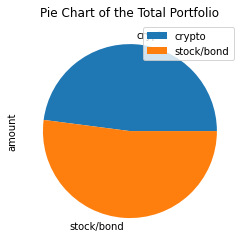

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE
savings_df.plot.pie(y='amount', title="Pie Chart of the Total Portfolio")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE
emergency_fund_value = monthly_income * 3

emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
if total_portfolio_value > emergency_fund_value:
    print(f"Congratulations, you have enough money to cover for your emergency fund")
# YOUR CODE HERE
elif total_portfolio_value == emergency_fund_value:
    print(f"Congratualations, you just reached your goal on covering your emergency fund")
else: 
    amount_needed = emergency_fund_value - total_portfolio_value 
    print(f"You are ${amount_needed} away from reaching your goal on covering your emergency fund")
 

Congratulations, you have enough money to cover for your emergency fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
start_date = pd.Timestamp("2019-02-05", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-02-04", tz="America/New_York").isoformat()
# YOUR CODE HERE

# Set number of rows to 1000 to retrieve the maximum amount of rows
# YOUR CODE HERE
limit_rows=1000

In [29]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df

# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
display(prices_df.head())


# YOUR CODE HERE
display(prices_df.tail())

<ipython-input-29-ca70723ce9de>:6: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  prices_df = alpaca.get_barset(


AGG                                        \
                             open      high      low     close   volume   
time                                                                      
2019-02-05 00:00:00-05:00  106.95  107.1400  106.950  107.0900  4918385   
2019-02-06 00:00:00-05:00  107.20  107.2200  106.985  107.0441  6022187   
2019-02-07 00:00:00-05:00  107.15  107.1983  107.030  107.1500  3080898   
2019-02-08 00:00:00-05:00  107.17  107.3800  107.170  107.3550  2988674   
2019-02-11 00:00:00-05:00  107.23  107.2800  107.150  107.1999  2686282   

                              SPY                                      
                             open      high     low   close    volume  
time                                                                   
2019-02-05 00:00:00-05:00  272.44  273.4400  271.88  273.13  61540042  
2019-02-06 00:00:00-05:00  272.79  273.3400  271.92  272.70  43446324  
2019-02-07 00:00:00-05:00  270.94  271.5500  268.29  269.97  83380785  
2019-02-08 00:00:00-05:00  268.75  270.2874  267.83  270.08  63409417  
2019-02-11 00:00:00-05:00  271.20  271.4900  270.03  270.64  57175393

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2022-01-31 00:00:00-05:00  111.64  111.8900  111.6000  111.78  11437834   
2022-02-01 00:00:00-05:00  111.66  111.6764  111.3800  111.59   9477222   
2022-02-02 00:00:00-05:00  111.70  111.9700  111.6744  111.72   7424696   
2022-02-03 00:00:00-05:00  111.26  111.3700  111.1300  111.27   9480330   
2022-02-04 00:00:00-05:00  110.75  110.7500  110.4707  110.56   6762828   

                              SPY                                        
                             open    high       low    close     volume  
time                                                                     
2022-01-31 00:00:00-05:00  441.24  450.28  439.8100  449.815  128202383  
2022-02-01 00:00:00-05:00  450.72  453.63  446.9384  452.960  106515279  
2022-02-02 00:00:00-05:00  455.50  458.12  453.0500  457.300   97807976  
2022-02-03 00:00:00-05:00  450.95  452.97  445.7100  446.640   99110054  
2022-02-04 00:00:00-05:00  446.35  452.78  443.8300  448.730   98775229

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE
MC_even_weight = MCSimulation(
    portfolio_data = prices_df,
    weights = [.40,.60,],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
# YOUR CODE HERE
MC_even_weight.portfolio_data.tail()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2022-01-31 00:00:00-05:00  111.64  111.8900  111.6000  111.78  11437834   
2022-02-01 00:00:00-05:00  111.66  111.6764  111.3800  111.59   9477222   
2022-02-02 00:00:00-05:00  111.70  111.9700  111.6744  111.72   7424696   
2022-02-03 00:00:00-05:00  111.26  111.3700  111.1300  111.27   9480330   
2022-02-04 00:00:00-05:00  110.75  110.7500  110.4707  110.56   6762828   

                                           SPY                             \
                          daily_return    open    high       low    close   
time                                                                        
2022-01-31 00:00:00-05:00    -0.000268  441.24  450.28  439.8100  449.815   
2022-02-01 00:00:00-05:00    -0.001700  450.72  453.63  446.9384  452.960   
2022-02-02 00:00:00-05:00     0.001165  455.50  458.12  453.0500  457.300   
2022-02-03 00:00:00-05:00    -0.004028  450.95  452.97  445.7100  446.640   
2022-02-04 00:00:00-05:00    -0.006381  446.35  452.78  443.8300  448.730   

                                                   
                              volume daily_return  
time                                               
2022-01-31 00:00:00-05:00  128202383     0.017865  
2022-02-01 00:00:00-05:00  106515279     0.006992  
2022-02-02 00:00:00-05:00   97807976     0.009581  
2022-02-03 00:00:00-05:00   99110054    -0.023311  
2022-02-04 00:00:00-05:00   98775229     0.004679

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
MC_even_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004488,0.999742,0.997338,0.990442,1.002315,1.001549,1.007803,0.988234,1.002208,0.997339,...,0.999461,0.999313,1.013354,1.008048,0.996509,0.981400,1.003502,0.997353,0.992814,1.002760
2,1.009676,0.999254,0.993675,0.992902,1.011124,1.013735,1.003103,0.991356,1.008997,1.000436,...,1.004542,1.002202,1.031843,1.002573,0.995212,0.975544,0.993466,0.997053,1.003994,0.996573
3,1.014362,1.000247,0.986351,1.003170,1.029429,1.001564,0.995660,0.999689,1.018135,1.003707,...,0.994457,1.019513,1.036077,1.008460,1.012470,0.966554,0.981001,0.990111,1.010178,1.005553
4,1.008609,0.996577,0.989547,1.006278,1.030503,0.989004,0.993043,1.006216,1.028184,1.008490,...,1.005751,1.027363,1.050286,1.007819,0.999718,0.973578,0.978142,0.996195,1.007877,1.003932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,62.724926,15.652184,11.605306,15.934698,53.028535,29.316531,15.893055,52.797246,26.657010,30.232818,...,16.814439,7.492109,26.200214,74.489778,9.494444,29.420331,14.906534,36.572615,64.149227,7.569005
7557,62.935714,15.666469,11.692388,15.854530,53.297605,29.095489,15.977642,53.467044,26.605633,30.173432,...,16.869461,7.527897,26.009233,74.898178,9.563738,29.581814,14.794279,36.747725,63.941180,7.658502
7558,63.550241,15.852304,11.681150,15.422182,53.134424,29.019092,15.851032,53.884646,26.575283,30.019981,...,16.864923,7.523292,25.938453,74.505770,9.444899,29.863317,14.851547,36.893260,63.551712,7.670029
7559,63.264096,15.968998,11.686074,15.522309,53.461396,28.968301,15.842346,53.514174,26.467403,29.809024,...,16.776454,7.591287,26.007840,74.582411,9.534032,30.036716,14.757433,36.609566,63.540230,7.646200


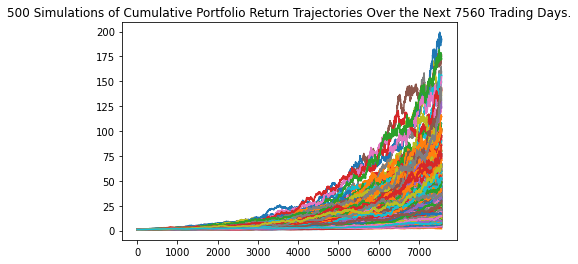

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
even_weight_line_plot = MC_even_weight.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

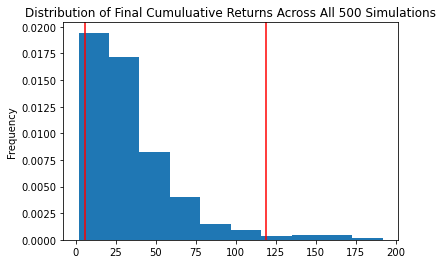

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
even_weight_distribution_plot = MC_even_weight.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
even_weight_table = MC_even_weight.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE
print(even_weight_table)

count           500.000000
mean             35.084039
std              29.108023
min               1.811833
25%              15.589509
50%              27.521244
75%              43.801491
max             192.029500
95% CI Lower      5.975213
95% CI Upper    119.087229
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(f"The current balance of the stock and bond portion is ${total_stocks_bonds_value}")

The current balance of the stock and bond portion is $71472.3


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# YOUR CODE HERE
ci_lower_thirty_cumulative_return = round(even_weight_table[8]*total_stocks_bonds_value,2)
ci_upper_thirty_cumulative_return = round(even_weight_table[9]*total_stocks_bonds_value,2)

# Print the result of your calculations
# YOUR CODE HERE
print(ci_lower_thirty_cumulative_return)
print(ci_upper_thirty_cumulative_return)

427062.21
8511438.19


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE
MC_even_weight = MCSimulation(
    portfolio_data = prices_df,
    weights = [.20,.80,],
    num_simulation = 500,
    num_trading_days = 252*10
)
# Review the simulation input data
# YOUR CODE HERE
MC_even_weight.portfolio_data.tail()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2022-01-31 00:00:00-05:00  111.64  111.8900  111.6000  111.78  11437834   
2022-02-01 00:00:00-05:00  111.66  111.6764  111.3800  111.59   9477222   
2022-02-02 00:00:00-05:00  111.70  111.9700  111.6744  111.72   7424696   
2022-02-03 00:00:00-05:00  111.26  111.3700  111.1300  111.27   9480330   
2022-02-04 00:00:00-05:00  110.75  110.7500  110.4707  110.56   6762828   

                                           SPY                             \
                          daily_return    open    high       low    close   
time                                                                        
2022-01-31 00:00:00-05:00    -0.000268  441.24  450.28  439.8100  449.815   
2022-02-01 00:00:00-05:00    -0.001700  450.72  453.63  446.9384  452.960   
2022-02-02 00:00:00-05:00     0.001165  455.50  458.12  453.0500  457.300   
2022-02-03 00:00:00-05:00    -0.004028  450.95  452.97  445.7100  446.640   
2022-02-04 00:00:00-05:00    -0.006381  446.35  452.78  443.8300  448.730   

                                                   
                              volume daily_return  
time                                               
2022-01-31 00:00:00-05:00  128202383     0.017865  
2022-02-01 00:00:00-05:00  106515279     0.006992  
2022-02-02 00:00:00-05:00   97807976     0.009581  
2022-02-03 00:00:00-05:00   99110054    -0.023311  
2022-02-04 00:00:00-05:00   98775229     0.004679

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
MC_even_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010633,0.991223,0.986831,1.015422,0.989708,1.005274,1.002050,0.994153,0.996980,1.009014,...,0.988263,0.985102,0.982017,0.992732,0.992202,0.987090,1.012875,0.999658,0.988054,0.987764
2,1.006907,0.994651,0.989906,1.025230,0.985452,0.997678,1.023537,1.001011,1.001861,1.010593,...,0.992768,0.988864,0.963855,0.993797,0.991575,0.992417,0.993577,1.003303,0.986666,0.979099
3,1.015731,0.986892,0.981249,1.039668,0.985006,0.975290,1.022907,1.008480,0.996583,1.010560,...,0.987444,0.976111,0.963686,0.992298,0.973163,0.990552,0.992951,1.000250,0.973184,0.978612
4,1.009644,0.994934,0.986574,1.044169,0.992120,0.978761,1.034083,1.018677,0.980491,0.994356,...,1.002827,0.999855,0.965441,0.988381,0.956501,0.996810,0.997472,0.984450,0.970608,0.967972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.572731,3.168296,7.674584,2.837500,3.241716,4.261239,5.750642,2.565631,1.846241,2.284660,...,2.057188,4.619919,2.836858,7.876862,1.913641,1.016664,1.606818,2.242826,0.933393,4.126083
2517,5.430450,3.163429,7.633014,2.812702,3.223682,4.265552,5.823578,2.542371,1.857884,2.275652,...,2.063113,4.666818,2.895061,7.746356,1.937138,1.017625,1.633025,2.252458,0.930612,4.114621
2518,5.373716,3.159604,7.675725,2.885086,3.241158,4.242866,5.746245,2.509126,1.859827,2.234074,...,2.084252,4.638383,2.896640,7.817077,1.987425,1.003950,1.634417,2.240791,0.925400,4.042555
2519,5.413421,3.112098,7.744767,2.924470,3.276191,4.319448,5.705975,2.519534,1.872961,2.230918,...,2.103516,4.630235,2.925398,7.676621,1.981578,1.003828,1.645448,2.251794,0.937024,4.039788


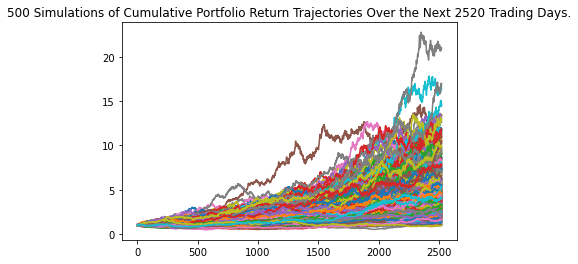

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
even_weight_line_plot = MC_even_weight.plot_simulation()

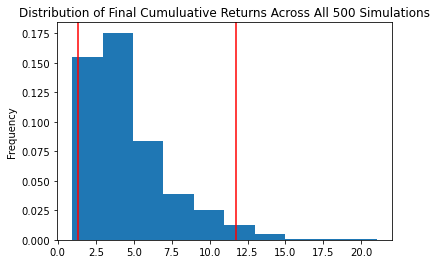

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
even_weight_distribution_plot = MC_even_weight.plot_distribution()

In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
even_weight_table = MC_even_weight.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE
even_weight_table

count           500.000000
mean              4.649231
std               2.812117
min               0.943695
25%               2.643731
50%               3.973353
75%               5.630449
max              21.000164
95% CI Lower      1.310967
95% CI Upper     11.770877
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(f"The current balance of the stock and bond portion is ${total_stocks_bonds_value}")

The current balance of the stock and bond portion is $71472.3


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(even_weight_table[8]*total_stocks_bonds_value,2)
ci_upper_ten_cumulative_return = round(even_weight_table[9]*total_stocks_bonds_value,2)

# Print the result of your calculations
# YOUR CODE HERE
print(ci_lower_ten_cumulative_return)
print(ci_upper_ten_cumulative_return)

93697.79
841291.68


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [44]:
Although putting more weight on stock and less on bonds will produce a better result to the investors, but looking at the results, the upper cumulative return looks promising, but the lower cumulative return was not. To get better look, I would suggest to try also a 40/60 (bond/stock) for 10 years and see what the output comes up with.

SyntaxError: invalid syntax (<ipython-input-44-7976b4c4cc86>, line 1)